<a href="https://colab.research.google.com/github/Charanpoojary/CREDIT-CARD-DEFAULT-PREDICTION-CLASSIFICATION-/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Predicting whether a customer will default on his/her credit card

## Problem Description 

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

# Data Description 

## Attribute Information: 

This research employed a binary variable, default payment=0,non default=1, as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,StandardScaler, Imputer, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier

### Initial Data Load

In [ ]:
from google.colab import drive  # mounting our drive to google colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 3.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
import xlrd

In [ ]:
input_file = "/content/drive/My Drive/Datasets/default of credit card clients.xls"
data = pd.read_excel(input_file)

In [ ]:
data.head()  # returns the first 5 rows of the dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,total_balance
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339


# Exploration

In [ ]:
data.shape   # Shape of the Data

(30000, 25)

In [ ]:
data.describe()    # returns the numerical columns

In [ ]:
data.info()   #returns the Information about Data

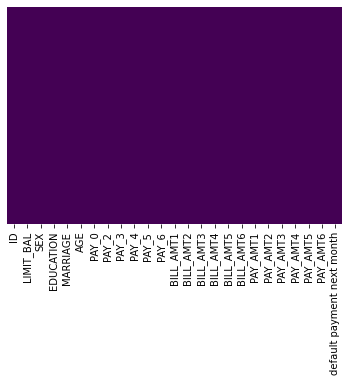

In [ ]:
 sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')   # Checking null values 

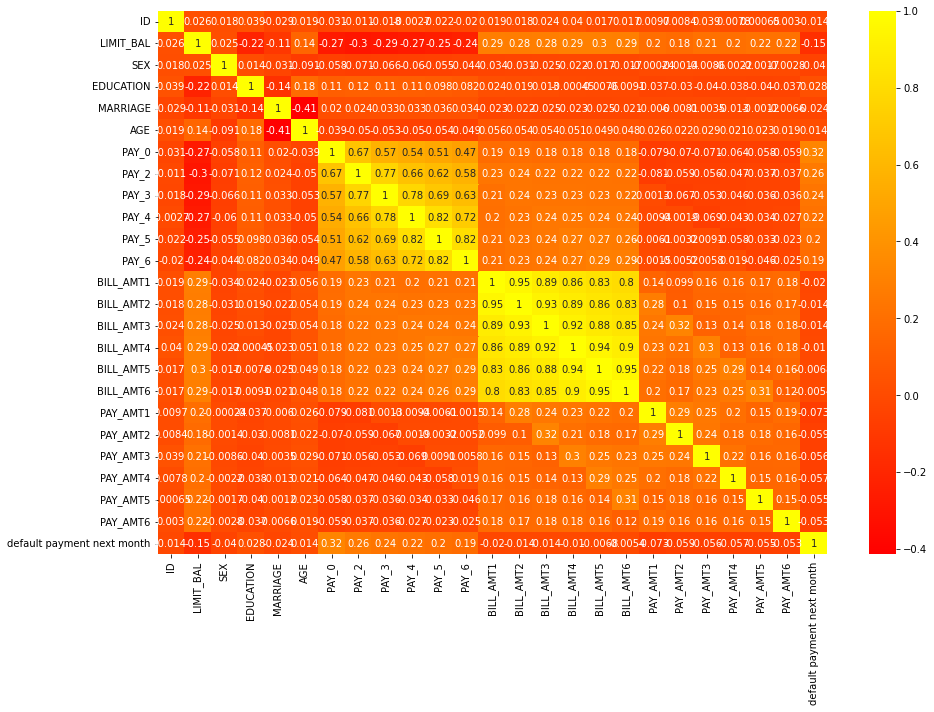

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))   # checking the correlation of the varibales
sns.heatmap(data.corr(), annot= True, cmap= "autumn",ax=ax)

In [ ]:
list(data.columns)  #  returns the columns of our dataset

#### Individual Feature Exploration

In [ ]:
data["default payment next month"].value_counts()   #returns the total no of default(0)(people who do no pay),no default(1)(people who pays)

0    23364
1     6636
Name: default payment next month, dtype: int64

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

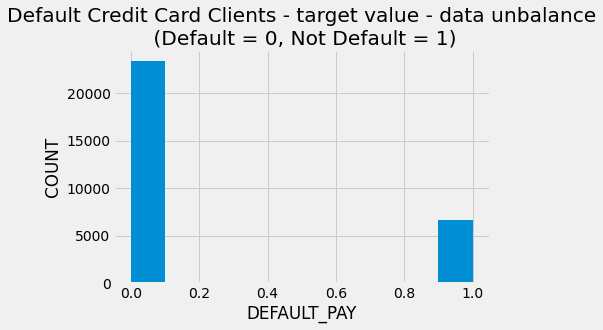

In [ ]:
plt.style.use('fivethirtyeight')
data["default payment next month"].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

In [ ]:
  #   Percentage of non Defaulters are smaller than the Defaulters in the given dataset

In [ ]:
data['SEX'].value_counts()  # returns the no of male(1) and female(2)

2    18112
1    11888
Name: SEX, dtype: int64

Text(0.5, 1.0, 'SEX v/s COUNT')

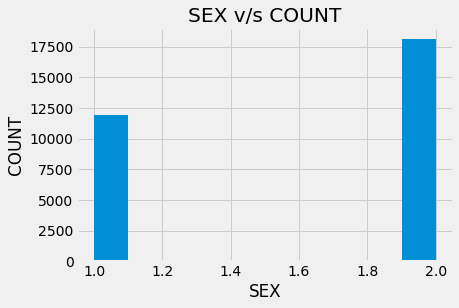

In [ ]:
plt.style.use('fivethirtyeight')
data['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

In [ ]:
# Number of Male credit holders are lesser than Female

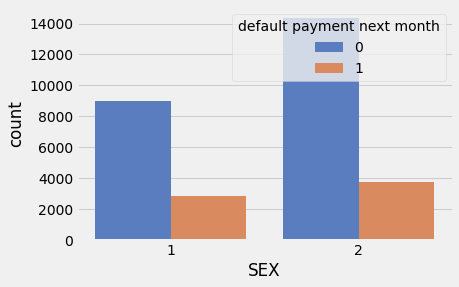

In [ ]:
# Checking the number of counts of defaulters and non defaulters SEX wise
sns.countplot(x='SEX', data=data,hue="default payment next month", palette="muted") 

In [ ]:
data['EDUCATION'].value_counts()         # Returns the value of Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

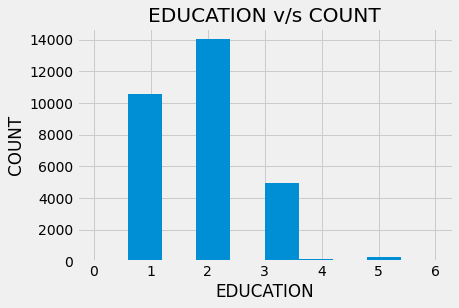

In [ ]:
plt.style.use('fivethirtyeight')
data['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

In [ ]:
# More number of credit holders are university students 

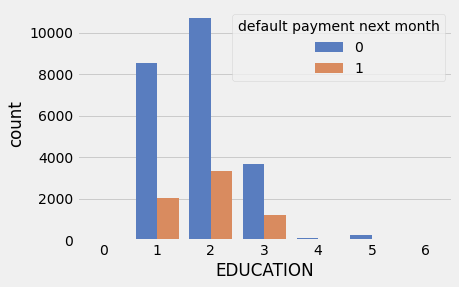

In [ ]:
# Checking the number of counts of defaulters and non defaulters educationwise
sns.countplot(x='EDUCATION', data=data,hue="default payment next month", palette="muted") 

In [ ]:
data['MARRIAGE'].value_counts()   # Marital status (1 = married; 2 = single; 3 = others).

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

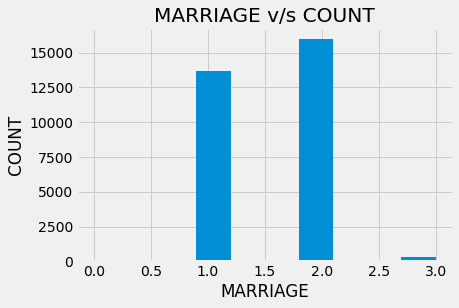

In [ ]:
plt.style.use('fivethirtyeight')
data['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

In [ ]:
# More number of credit cards holder are Married

In [ ]:
# Checking the number of counts of defaulters and non defaulters marital status wise

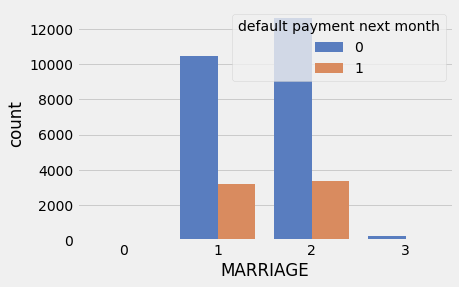

In [ ]:
g=sns.countplot(x="MARRIAGE", data=data,hue="default payment next month", palette="muted")

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
Name: AGE, dtype: int64
NANs found: 0


Text(0.5, 1.0, 'Age Distribution')

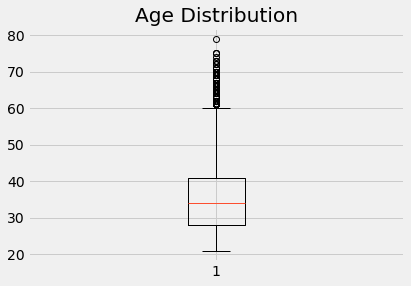

In [ ]:
# age distributon
print(data['AGE'].value_counts().nlargest(10))
print('NANs found:', sum(data['AGE']==0)) 
plt.boxplot(data['AGE'])
plt.title("Age Distribution")

### Feature Correlation Exploration

Text(0.5, 1.0, 'Distribution of Default by Age')

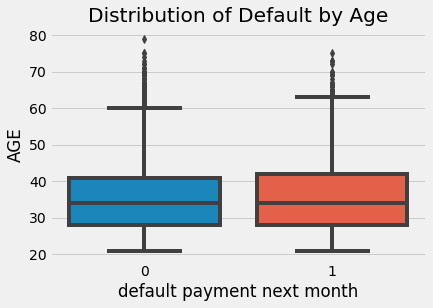

In [ ]:
## Checking the number of counts of defaulters and non defaulters age wise
sns.boxplot(x="default payment next month", y="AGE", data=data)
plt.title("Distribution of Default by Age")

Text(0.5, 1.0, 'Distribution of Default by Sex and Age')

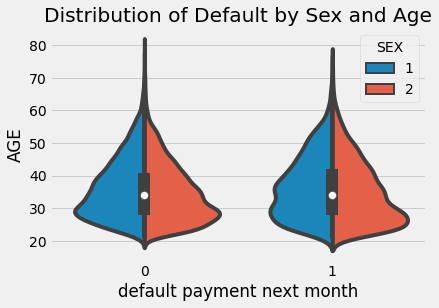

In [ ]:
# above plot we have drawn by considering the gender
sns.violinplot(x="default payment next month", y="AGE", hue="SEX", data=data, split=True)
plt.title("Distribution of Default by Sex and Age")

# Preprocessing

### Feature Manipulation


In [ ]:
data['EDUCATION'].loc[data['EDUCATION'] == 6]=5 # we know that education has 6 types where 5,6 are unknown so we are trying to merge it

### Derived Features

In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'total_balance'],
      dtype='object')

In [ ]:
total_balance=data[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]  #  creating a small dataset using these columns 
data['total_bill_amount']=total_balance.sum(axis=1)  # creating a new column using above datasets sum(row wise)

In [ ]:
total_balance  # newly created dataset

In [ ]:
data['total_bill_amount']   # newly created columns

In [ ]:
# now we will check our dataset
data.head()  #returns the first 5 rows of the dataset

In [ ]:
# how much they have paid
total_pay_amount=data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]   ##  creating a small dataset using these columns 
data['total_pay_amount']=total_pay_amount.sum(axis=1)   #  # creating a new column using above datasets sum(row wise)

In [ ]:
total_pay_amount     # newly created dataset

In [ ]:
data['total_pay_amount']  # newly created columns

In [ ]:
# now we will check our dataset
data.head()  #returns the first 5 rows of the dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,total_pay_amount,total_bill_amount
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,689,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,5000,17077
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,11018,101653
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,8388,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,59049,109339


In [ ]:
# now we have created two columns ,lets find the difference of that

In [ ]:
data['total_diff']=data['total_bill_amount']-data['total_pay_amount']  # creating a new column,by using above column
data['total_diff']

0          7015
1         12077
2         90635
3        222946
4         50290
          ...  
29995    682799
29996      6692
29997     39196
29998    119430
29999    222566
Name: total_diff, Length: 30000, dtype: int64

In [ ]:
# now we will check our dataset
data.head()  #returns the first 5 rows of the dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,total_pay_amount,total_bill_amount,total_diff
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,689,7704,7015
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,5000,17077,12077
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,11018,101653,90635
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,8388,231334,222946
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,59049,109339,50290


In [ ]:
pay_len=data[['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]    ##  creating a small dataset using these columns 
data['pay_over_time']=pay_len.sum(axis=1)        #  # creating a new column using above datasets sum(row wise)

In [ ]:
pay_len  # newly created dataset

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
29995,0,0,0,0,0,0
29996,-1,-1,-1,-1,0,0
29997,4,3,2,-1,0,0
29998,1,-1,0,0,0,-1


In [ ]:
data['pay_over_time']  # newly created columns

In [ ]:
# now we will check our dataset
data.head()  #returns the first 5 rows of the dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,total_pay_amount,total_bill_amount,total_diff,pay_over_time,pay_over_tme
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,689,7704,7015,-2,-2
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,5000,17077,12077,3,3
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,11018,101653,90635,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,8388,231334,222946,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,59049,109339,50290,-2,-2


In [ ]:
data['total_no_cons']=(pay_len ==-2 ).sum(axis=1)
data['total_full_pay']=(pay_len ==-1 ).sum(axis=1)
data['revolve_credit']=(pay_len ==0 ).sum(axis=1)
data['late_pays']=(pay_len >0 ).sum(axis=1)

Because the values inputted in the PAY columns are negative and positive, the  sum of these values do not show enough information of the person's credit card payment patterns. We decided to create four other features to reflect how many times they didn't use their credit card, paid their bill in full, used their revolving credit, and how many total months they were late on payments.

### Data Separation

In [ ]:
as_category = ['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','SEX','EDUCATION','MARRIAGE']

Several other features also represented factors better than they represented numeric values. For example, gender, marriage, and education also do not follow the standard numerical rulesare better as categories. The individual Pay columns also benefit from being factors. 

In [ ]:
as_numeric = ['ID','LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
             'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6','total_bill_amount','total_pay_amount','total_diff',
             'pay_over_time','total_no_cons','total_full_pay','revolve_credit','late_pays']

Array of numeric data labels

In [ ]:
labels = ['default payment next month']

Vector of output labels

### Preprocessing Definitions

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
         return X[self.attribute_names]

In [ ]:
class DummyEncoder(TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def transform(self, X, y=None, **kwargs):
        return pd.get_dummies(X, columns=self.columns)
    def fit(self, X, y=None, **kwargs):
        return self

### Pipelines

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe=Pipeline([
        ("selector", DataFrameSelector(as_numeric)),
        ("scale", StandardScaler())
        ])

In [ ]:
cat_pipe=Pipeline([
        ("selector", DataFrameSelector(as_category)),
        ("convert", DummyEncoder(columns=as_category)),
        ("scale", StandardScaler())
        ])


In [ ]:
full_pipeline = FeatureUnion(transformer_list=[
        ("cat_pipeline", cat_pipe ),
        ("num_pipeline", num_pipe ),
        ])

In [ ]:
dat_prepared = full_pipeline.fit_transform(data)

# Create Train and Test Sets


We reserved 30% of the data for the test set, the remainder acting as the training set.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(dat_prepared,data[labels], test_size=0.3)

# Dimensionality Reduction


### PCA

In [ ]:
pca = PCA(n_components = 25)
X25D = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

[0.12671254 0.06510435 0.06096369 0.05489611 0.03840154 0.03787279
 0.03293215 0.03108344 0.02631126 0.02451755 0.02174215 0.02087583
 0.02009795 0.01954898 0.01690812 0.01604894 0.01494237 0.01475338
 0.01422866 0.01361904 0.01231696 0.01165934 0.01148459 0.01128596
 0.01066176]


We first used PCA to find the optimum number of dimensions, with 25 dimensions, the original number of dimensions before derived and dummie features were added, we see about 12% of the datas variance lies along the first axis.

54
[0.12671254 0.06510436 0.06096369 0.05489612 0.03840156 0.03787294
 0.0329323  0.03108365 0.02631279 0.0245227  0.02174427 0.02087921
 0.0201045  0.01955993 0.01693096 0.01607139 0.01501235 0.01477378
 0.01432612 0.0136644  0.01241535 0.0118478  0.01171435 0.01164268
 0.01095427 0.01078468 0.01052282 0.01022421 0.01011288 0.00997812
 0.00982538 0.00956079 0.00947365 0.00924867 0.0087519  0.00832323
 0.00827067 0.00815128 0.00778092 0.00755831 0.00748545 0.00734638
 0.00716611 0.00672842 0.00650705 0.00622335 0.00607323 0.00554496
 0.005184   0.00508472 0.00480395 0.00446536 0.00436531 0.00422656]


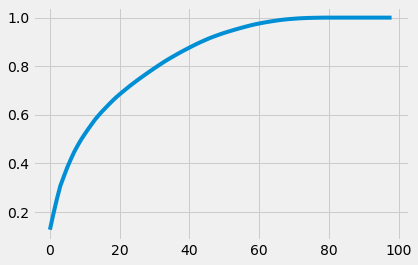

In [ ]:
pca2 = PCA()
pca2.fit(X_train)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)
pca2 = PCA(n_components = d)
XdD = pca2.fit_transform(X_train)
print(pca2.explained_variance_ratio_)
plt.plot(cumsum)

We then ran a form of PCA which would find the number of copmonents which would be required to get 95%. After running this we saw 50 was the minimum number of components needed to preserve 95% of the training set's variance. We plotted the cumsum and found the elbow to appear around 50. Since 50 principle components is not ideal we decided to explore other dimensionality reduction techniques. 

### LLE

Since PCA did not work well with our dataset, we moved onto locally linear embedding to try and reduce our dimensions. Using LLE we reduced our dimensions to 2. We later tested the reduced dimensions with LLE.

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X_train)
X_reduced

array([[-0.00125245, -0.00042407],
       [-0.00202678,  0.00796776],
       [-0.00131816, -0.0008036 ],
       ...,
       [-0.00533841,  0.00848827],
       [-0.00146226, -0.00036733],
       [-0.00220226,  0.0080544 ]])

# Models

### Logistic Regression

In [ ]:
clf_reg=LogisticRegression()
clf_reg.fit(X_train,Y_train)
Y_pred_logr=clf_reg.predict(X_train)
Y_predict_logr=clf_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Score of Logistic Regression Model on train: ","{0:.4f}".format(clf_reg.score(X_train,Y_train)))

Score of Logistic Regression Model on train:  0.8181


For our first classifier model, we developed a Logistic Regression model. We printed out the score of the model on the trained data set versus the test data set. Based on the two scores we can see that there is no issue of an overfit, and that the model has over an 82.33% accuracy.

### Logistic Regression with LLE

In [ ]:
clf_reg_lle=LogisticRegression()
clf_reg_lle.fit(X_reduced,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print("Score of Logistic Regression Model with LLE on train: ","{0:.4f}".format(clf_reg_lle.score(X_reduced,Y_train)))

Score of Logistic Regression Model with LLE on train:  0.7753


By using the training test produced from LLE we actually saw about a 5% decrease in accuracy. Although it was unfortunate not to see our accuracy improve, the model would be adequate for a situation where the results need to be explained.

### SVC

In [ ]:
svm_clf=LinearSVC()
svm_clf.fit(X_train,Y_train)
Y_train_pred_svm=svm_clf.predict(X_train)
Y_predict_clf=svm_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
print("Score of SVM Regression Model on train: ",svm_clf.score(X_train,Y_train))

Score of SVM Regression Model on train:  0.8174285714285714


We then developed a Support Vector Machine model, specifically a Soft Margin Classifier (SVC). For this model, we also looked at the score on the train and test set in order to see the model's overall performance. We do see a difference in perfomance if we compared this model to a simple logistic regression model. Our score for the Soft Margin Classifier is in fact very similar to the Logistic Regression model.

### SVC with LLE

In [ ]:
svm_clf_lle=LinearSVC()
svm_clf_lle.fit(X_reduced,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC()

In [ ]:
print("Score of SVM Regression Model with LLE on train: ","{0:.4f}".format(svm_clf_lle.score(X_reduced,Y_train)))

Score of SVM Regression Model with LLE on train:  0.7756


Similar to Logistic Regression, the accuracy did not improve with the set from dimensionality reduction.

# Fine Tuning

In [ ]:
logreg_grid=[
    {'C':[0.001, 0.01, 0.1, 1, 1.01,1.1],
     'max_iter':[100,1000],'warm_start':['True','False']},
]
log_reg=LogisticRegression()
grid_search=GridSearchCV(log_reg,logreg_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train,Y_train.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 1.01, 1.1],
                          'max_iter': [100, 1000],
                          'warm_start': ['True', 'False']}],
             scoring='neg_mean_squared_error')

Since the Logistic Regression model slightly performed better than a SVM Classifier, we decied to fine tune the Logistic Regression model. GridSearchCV was implemented in order to find the best hyperparameters.

In [ ]:
print("Best Parameters:",grid_search.best_params_)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'warm_start': 'True'}


In [ ]:
best_c_param=grid_search.best_params_.get('C')
best_max_iter_param=grid_search.best_params_.get('max_iter')
best_warm_start_param=grid_search.best_params_.get('warm_start')

We then stored a copy the best hyperparameter values in order to tune our model and begin training again.

# Re-Tuned Model

We now begin to retrain our re-tuned Logistic Regression model in comparison with a Logistic Regression model with LLE dimensionality reduction.

### Logistic Regression

In [ ]:
clf_reg_retuned=LogisticRegression(C=best_c_param,max_iter=best_max_iter_param,
                                  warm_start=best_warm_start_param)
clf_reg_retuned.fit(X_train,Y_train)
Y_pred_logr_retuned=clf_reg_retuned.predict(X_train)
Y_predict_logr_retuned=clf_reg_retuned.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Score of Logistic Regression Model on train: ","{0:.4f}".format(clf_reg_retuned.score(X_train,Y_train)))

Score of Logistic Regression Model on train:  0.8181


### Logistic Regression using LLE

In [ ]:
clf_reg_lle_retuned=LogisticRegression(C=best_c_param,max_iter=best_max_iter_param,
                                  warm_start=best_warm_start_param)
clf_reg_lle_retuned.fit(X_reduced,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, warm_start='True')

In [ ]:
print("Score of Logistic Regression Model with LLE on train: ","{0:.4f}".format(clf_reg_lle_retuned.score(X_reduced,Y_train)))

Score of Logistic Regression Model with LLE on train:  0.7753


Based on the scores of the Logistic Regression model and the Logistic Regression model with LLE dimensionality reduction after being re-tuned, we noticed the model performed slightly better without the use of LLE, so we have decided to try an ensemble method.

# Ensemble Learning

## Bagging Classifier

Because our previous models were not improving as much as we would have liked, we then turned to ensemble learning. For our first method, we tried a Bagging Classsifier using a Decision Tree Classifier.

Many of the parameters were manually adjusted while looking at the score on the training and test set.

In [ ]:
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(splitter='random',max_depth=10,max_features=47),n_estimators=500,
    max_samples=320,bootstrap=True,n_jobs=-1,oob_score=False)
bag_clf.fit(X_train,Y_train.values.ravel())
predict_bagging1=bag_clf.predict(X_train)
predict_bagging=bag_clf.predict(X_test)

In [ ]:
print("Decision Tree Classifier with Bagging Score on Training: ", "{0:.4f}".format(bag_clf.score(X_train,Y_train)))

Decision Tree Classifier with Bagging Score on Training:  0.8180


In [ ]:
print("Decision Tree Classifier with Bagging Score on Test :","{0:.4f}".format(bag_clf.score(X_test,Y_test)))

Decision Tree Classifier with Bagging Score on Test : 0.8318


Below we can see the two scores on the training and test set in which this method showed slight improvements from our previous models. Not only that, but we can see that we are not overfitting since our score on the test set did not have a significantly large difference compared to the training set.

## Voting Classifier

We then implemented a Voting Classifier using 3 of our previous models: Logistic Regression, LinearSVC, and DecisionTreeClassifier. A new model added was a Random ForestClassifier.

In [ ]:
log_clf=LogisticRegression(C=best_c_param,max_iter=best_max_iter_param,
                                  warm_start=best_warm_start_param)
rnd_clf=RandomForestClassifier(bootstrap=True,max_depth=5,max_features=30,
                               n_estimators=155)
svm_clf=LinearSVC(C= 0.01, loss= 'squared_hinge')
dt_clf=DecisionTreeClassifier(splitter='random',max_depth=10,max_features=47)
voting_clf=VotingClassifier(
    estimators=[('lr',log_clf),
               ('rf',rnd_clf), ('svc',svm_clf),('dt',dt_clf)],voting='hard')
voting_clf.fit(X_train, Y_train.values.ravel())
predict_voting=voting_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
for class_algo in (log_clf, rnd_clf,svm_clf,dt_clf,voting_clf):
    class_algo.fit(X_train,Y_train.values.ravel())
    y_pred=class_algo.predict(X_test)
    print(class_algo.__class__.__name__,
         accuracy_score(Y_test,y_pred))

LogisticRegression 0.8312222222222222
RandomForestClassifier 0.8314444444444444


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC 0.8312222222222222
DecisionTreeClassifier 0.826


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


VotingClassifier 0.8304444444444444


To see our overall performance from the Voting Classifier, we printed out the accuracy score of each model used within the classifier as well as the overall accuracy score of the model.

# Evaluation

To evaluate three of our top models, we will focus on the confusion matrices, classification model, and accuracy scores in order to see  the models' performances with classification.

## Logistic Regression

### Confusion Matrix

In [ ]:
confusion_matrix(Y_test,Y_predict_logr)

array([[6772,  311],
       [1208,  709]])

Below is the confusion matrix for the logistic regression model.  In counter clockwise order, we have true negatives, false negatives, true positives, and then false positives. We notice that for our Logistic Regression model we had many true negatives which means we had many correct guesses for a person not defaulting on their credit card. 

### Classification Report

A classification report was then ran in which we now see the precision and recall values.

In [ ]:
print(classification_report(Y_test,Y_predict_logr))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7083
           1       0.70      0.37      0.48      1917

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.69      9000
weighted avg       0.82      0.83      0.81      9000



### ROC

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
y_scores_reg = cross_val_predict(clf_reg, X_test, Y_test.values.ravel(), cv=3, 
method="decision_function")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
roc_auc_score(Y_test, y_scores_reg)

0.7710709538315013

## Bagging Classifier

### Confusion Matrix

Below is the confusion matrix for the Bagging Classifier.

In [ ]:
confusion_matrix(Y_test,predict_bagging)

array([[6753,  330],
       [1184,  733]])

### Classification Report

In order to see the performance, we looked further at the classification report.

In [ ]:
print(classification_report(Y_test,predict_bagging))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7083
           1       0.69      0.38      0.49      1917

    accuracy                           0.83      9000
   macro avg       0.77      0.67      0.70      9000
weighted avg       0.82      0.83      0.81      9000



### ROC

In [ ]:
y_scores_bag = cross_val_predict(bag_clf, X_test, Y_test, cv=3)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
roc_auc_score(Y_test, y_scores_bag)

0.6650102506895105

Which is understandable when seeing the ROC AUC of bagging was a lot closer to the "random" performance standard.

## Voting Classifier

Below is the confusion matrix for the Voting Classifier.

### Confusion Matrix

In [ ]:
confusion_matrix(Y_test,predict_voting)

array([[6805,  278],
       [1241,  676]])

In order to see the performance, we looked further at the classification report.

### Classification Report

In [ ]:
print(classification_report(Y_test,predict_voting))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7083
           1       0.71      0.35      0.47      1917

    accuracy                           0.83      9000
   macro avg       0.78      0.66      0.69      9000
weighted avg       0.82      0.83      0.81      9000



### ROC

In [ ]:
y_scores_voting = cross_val_predict(voting_clf, X_test, Y_test, cv=3)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-pack

In [ ]:
roc_auc_score(Y_test, y_scores_voting)

0.6568087048338315

## Model Accuracies

From all of our training on different learning algorithms, below we can compare the accuracy scores from all of our used models in order to see how well we are able to determine whether a person defaults on their credit card or not.

In [ ]:
print("Accuracy of Logistic Regression Model: ",
      float("{0:.4f}".format(accuracy_score(Y_test,Y_predict_logr))))
print("Accuracy of SVC Model: ",
      float("{0:.4f}".format(accuracy_score(Y_test,Y_predict_clf))))
print("Accuracy of Bagging Classifier: ",
      float("{0:.4f}".format(accuracy_score(Y_test,predict_bagging))))
print("Accuracy of Voting Classifier: ",
      float("{0:.4f}".format(accuracy_score(Y_test,predict_voting))))

Accuracy of Logistic Regression Model:  0.8312
Accuracy of SVC Model:  0.832
Accuracy of Bagging Classifier:  0.8318
Accuracy of Voting Classifier:  0.8312


# Conclusion

  After exploring, manipulating and experimenting with different models on the credit card default data set we have obtained a maximum accuracy of 83% to determine whether a person defaults on their credit card or not. Ideally we would have been able to increase this accuracy by trying out various ways of preprocessing the data, utilizing dimensionality reduction, fine-tuning the models' hyperparameters, and applying ensemble learning. 
  
   First we derived new features from the data set. Since this resulted in about 100 features we explored dimensionality reduction. Using the second form of reduction, LLE, we ran our initial classification models, Logistic Regression and Support Vector Classifier with original training set and the reduced set. Seeing no improvement with the set produced in LLE we continued using our original training set.
   
  Next we fine-tuned the better performing model, Logisitic Regression, with GridSearchCV as another attempt to improve the model. After using GridSearchCV no significant improvements were seen. 
  
  This led us to trying ensemble learning to see if our overall accuracy could be improved by combining various models' predictions. Once again there did not seem to be a significant improvement in both the Bagging Classifier and Voting Classifier  when compared to our Logisitic Regression model.
  
  In the end, looking at the accuracy scores of each model was not enough information to choose which model performed best when trying to predict whether or not a person would default on their credit card. Above one can clearly see how close all these accuracy scores fall. In fact, by just seeing the accuracy scores the Voting Classifier seems to perform the best. But if looks at performance via ROC curves the Logistic Regression model seems to perform the best and the Voting Classifier does significantly worse.
  
  For future work, we think it would be interesting to develop more complex models, such as implementing a neural network and seeing if there could be a better performance of an 83% accuracy score since all our previous techniques did not seem to effect the accuracy.
  